<a href="https://colab.research.google.com/github/piyushdawadi/Stock-Prediction-using-LSTM/blob/main/Stock_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [4]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1983-01-31,0.183036,0.185826,0.179129,0.182478,0.141995,188003200
1,1983-02-01,0.182478,0.186384,0.179688,0.186384,0.145034,210963200
2,1983-02-02,0.186384,0.195313,0.183594,0.191406,0.148942,267052800
3,1983-02-03,0.191406,0.199777,0.189732,0.199219,0.155022,252537600
4,1983-02-04,0.199219,0.202567,0.195871,0.196429,0.152851,214345600


In [7]:
df.shape

(10082, 7)

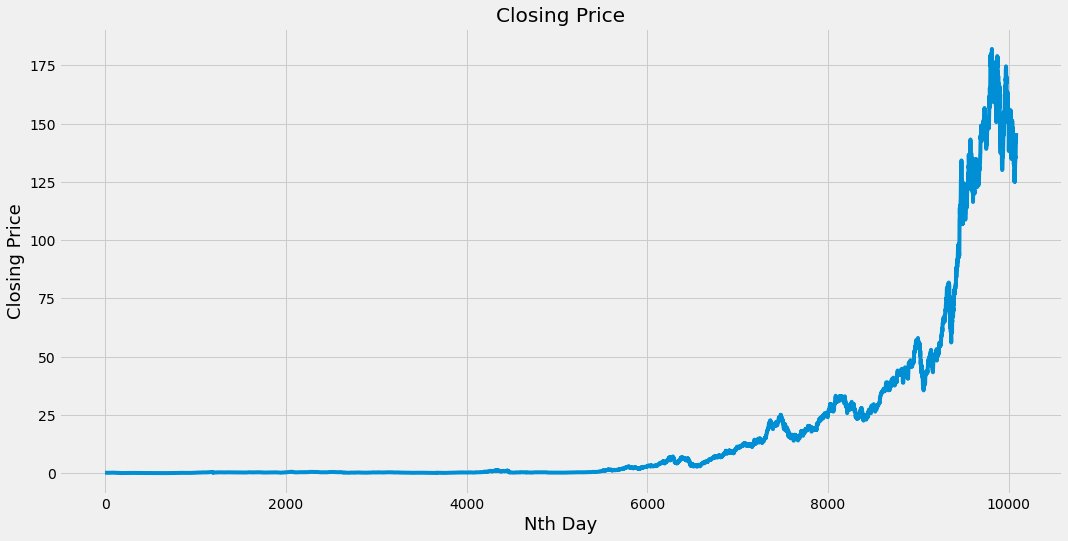

In [10]:
#Putting the closing prices in graphical format
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Nth Day',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

In [12]:
# Selecting only Close Column for operation
mydf = df.filter(['Close'])

# Converting the dataframe into a numpy array
np_array = mydf.values

# Training data length

training_data_len = math.ceil(len(np_array)*0.8)

In [13]:
# Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(np_array)
scaled_data

array([[6.47150676e-04],
       [6.68618671e-04],
       [6.96220379e-04],
       ...,
       [7.79329270e-01],
       [7.90871236e-01],
       [8.01698591e-01]])

In [14]:
# Creating a scaled training dataset
train_data =  scaled_data[0:training_data_len,:]
X_train = []
y_train = []

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if(i<=61):
    print(X_train)
    print(y_train)
    print()

[array([0.00064715, 0.00066862, 0.00069622, 0.00073916, 0.00072383,
       0.00068089, 0.00067169, 0.00068089, 0.00074836, 0.00078516,
       0.00077903, 0.00075756, 0.0007361 , 0.00072383, 0.00075756,
       0.00078516, 0.00079437, 0.00082504, 0.0007913 , 0.0007637 ,
       0.0007821 , 0.0007913 , 0.0007545 , 0.00073916, 0.00071769,
       0.00068395, 0.00071462, 0.00069929, 0.00068395, 0.00065942,
       0.00067475, 0.00067475, 0.00068395, 0.00069929, 0.00072383,
       0.0007361 , 0.00068395, 0.00070235, 0.00070235, 0.00068702,
       0.00071769, 0.00072996, 0.00068089, 0.00065328, 0.00063488,
       0.00062568, 0.00061648, 0.00061034, 0.00066555, 0.00068702,
       0.00072383, 0.00074836, 0.00076676, 0.00079743, 0.00078516,
       0.00088638, 0.00092012, 0.00089558, 0.00083731, 0.00087104])]
[0.0008587747623855424]

[array([0.00064715, 0.00066862, 0.00069622, 0.00073916, 0.00072383,
       0.00068089, 0.00067169, 0.00068089, 0.00074836, 0.00078516,
       0.00077903, 0.00075756, 0.

In [15]:
# Conversion of trianing and testing set into numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [16]:
# Reshaping cause LSTM takes 3D array as an input
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(8006, 60, 1)

In [17]:
# Model Creation
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape= (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
# Model Compilation
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
# Model Training
model.fit(X_train,y_train,batch_size=1,epochs=1)

8006/8006 [==============================] - 292s 36ms/step - loss: 2.2332e-05


In [24]:
# Test Data Creation
test_data=scaled_data[training_data_len-60:,:]
#Creating data set for X_test and y_test
X_test = []
y_test = np_array[training_data_len:,:]
for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [25]:
# Conversion to array
X_test = np.array(X_test)

In [26]:
# Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_train.shape[1],1))

In [27]:
# Prediction
prediction = model.predict(X_test)
# Inverse scalar tranfor
prediction = scalar.inverse_transform(prediction)

63/63 [==============================] - 2s 16ms/step


In [28]:
# Calculation of RMS Error
rsme=np.sqrt(np.mean(prediction-y_test)**2)
rsme

0.2317599563573199

<ipython-input-30-fef978ea620b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


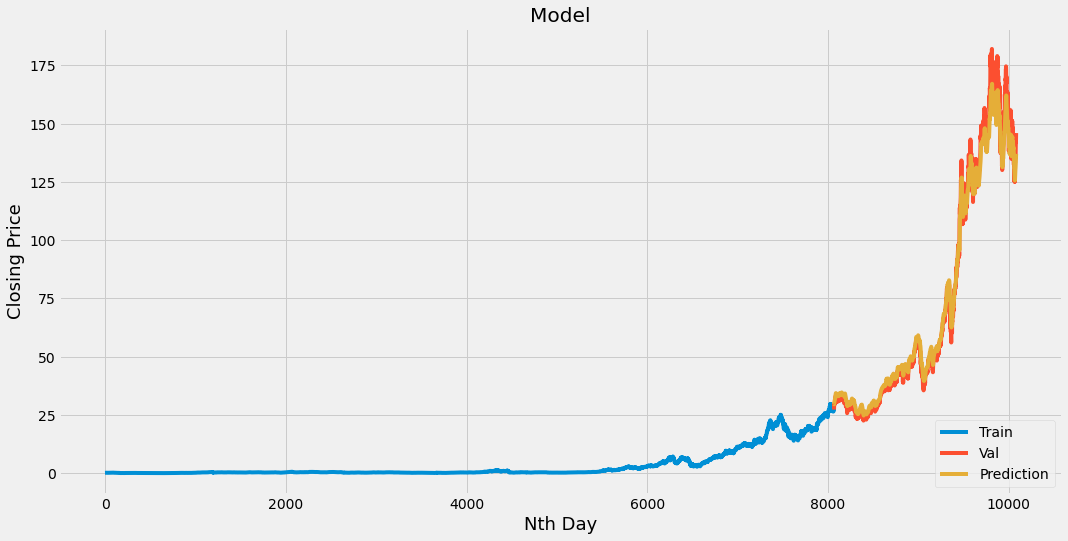

In [30]:
#Plotting the data
train = mydf[:training_data_len]
valid = mydf[training_data_len:]
valid['Prediction'] = prediction

#Visualization of the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Nth Day',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.savefig('pred')


In [31]:
# Saving the model
model.save("AAPL_LSTM.h5")

In [32]:
valid

,Close,Prediction
8066,27.285000,29.638863
8067,28.827499,29.564745
8068,29.725000,29.780012
8069,29.290001,30.225052
8070,29.657499,30.529842
...,...,...
10077,141.110001,132.353592
10078,142.529999,133.619354
10079,141.860001,135.002060
10080,143.960007,135.958679
